## Positionnement des lames

on définit des configurations pour la position des lames

<!-- TEASER_END -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig_width = 13

In [3]:
N_lame = 8**2
# on définit l'ensemble des lames comme un tableau de (x, y, theta) x N_lame
lames = np.ones((3, N_lame))

### grille rectangulaire

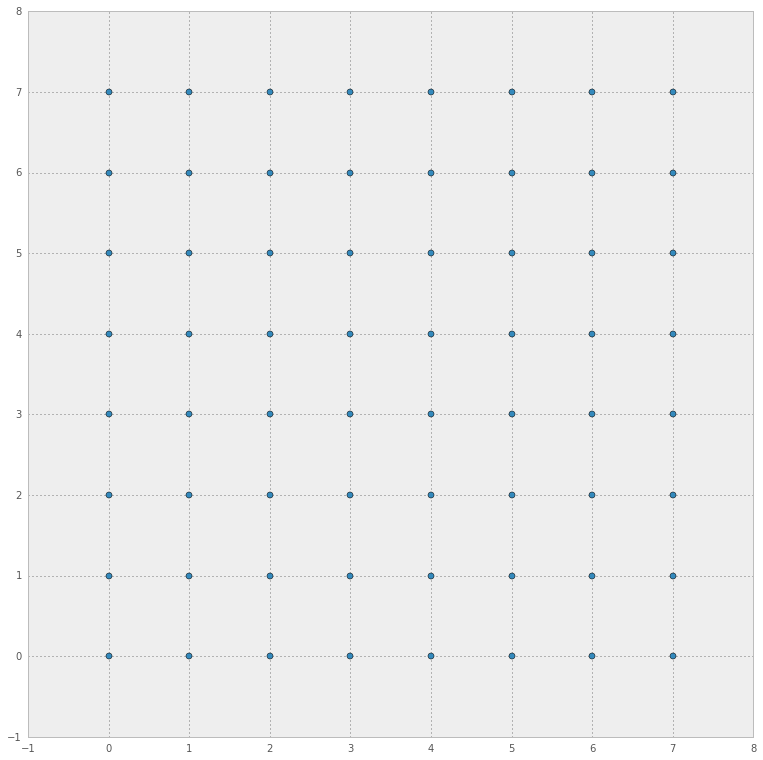

In [4]:
N_lame_X = np.sqrt(N_lame)

lames[0, :] = np.mod(np.arange(N_lame), N_lame_X)
lames[1, :] = np.floor(np.arange(N_lame)/N_lame_X)

fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
_ = ax.plot(lames[0, :], lames[1, :], 'o')
_ = plt.axis([-1, 8, -1., 8])

### grille hexagonale

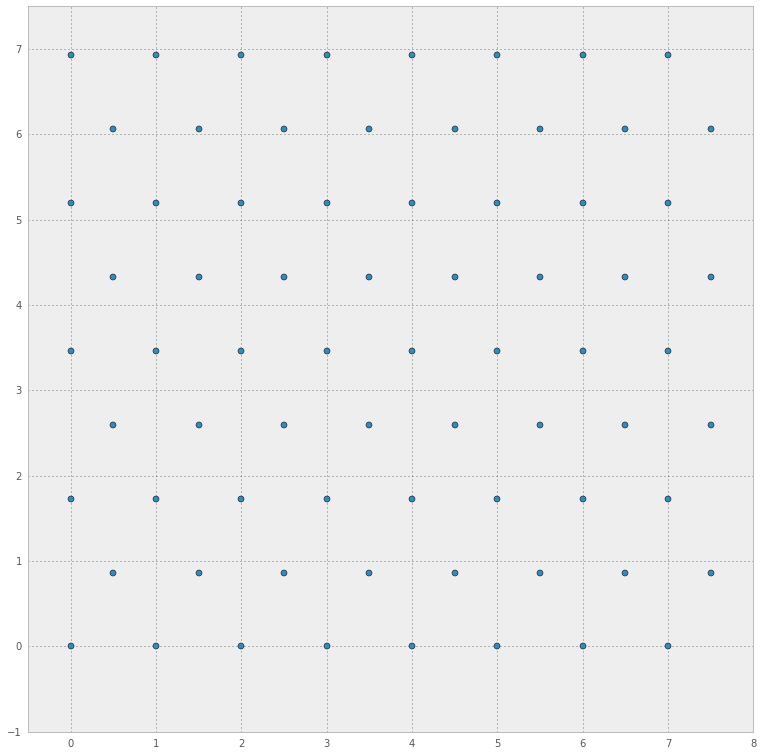

In [5]:
N_lame = 72
# on définit l'ensemble des lames comme un tableau de (x, y, theta) x N_lame
lames = np.ones((3, N_lame))
N_lame_X = np.sqrt(N_lame)#/(np.sqrt(3)/2)
N_lame_X = np.int(N_lame_X)

lames[0, :] = np.mod(np.arange(N_lame), N_lame_X) + np.mod(np.floor(np.arange(N_lame)/N_lame_X), 2)/2 
lames[1, :] = np.floor(np.arange(N_lame)/N_lame_X) 
lames[1, :] *= np.sqrt(3)/2

fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.plot(lames[0, :], lames[1, :], 'o')
_ = plt.axis([-.5, 8, -1., 7.5])

voir http://stackoverflow.com/questions/2459402/hexagonal-grid-coordinates-to-pixel-coordinates#2459541

## ajout d'un champ d'orientations

### orientations aléatoires

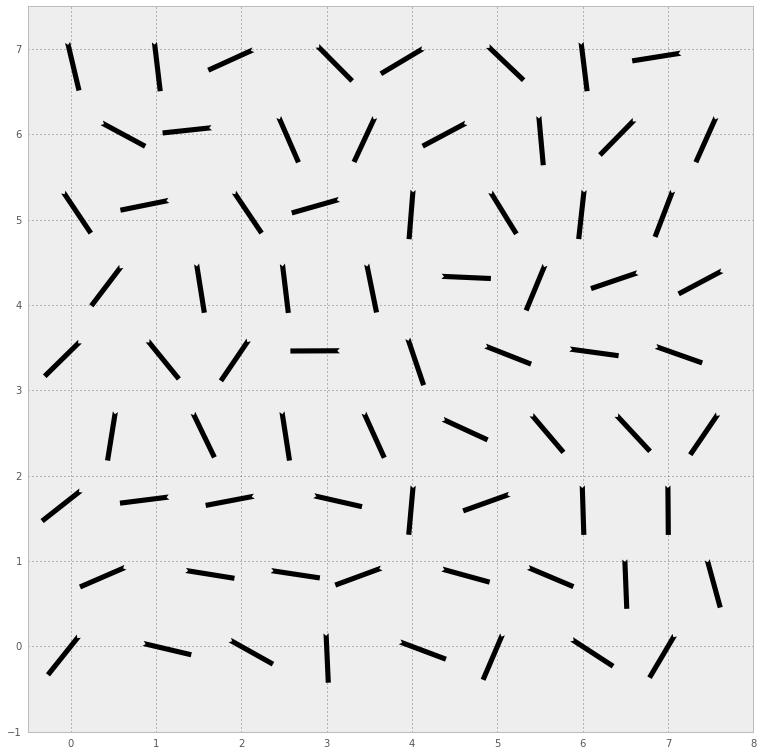

In [6]:
lames[2, :] = np.pi*np.random.rand(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

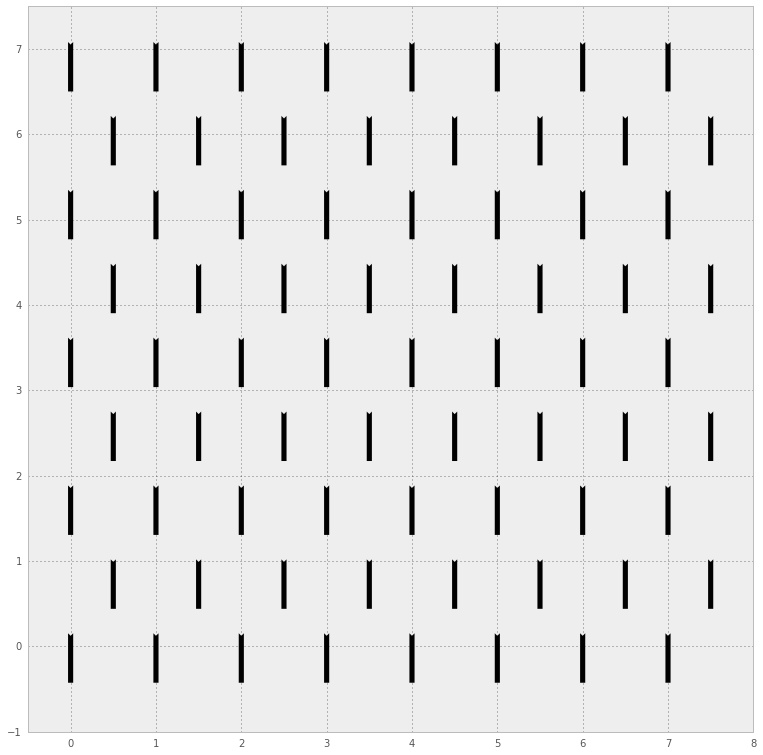

In [7]:
lames[2, :] = np.pi/2
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

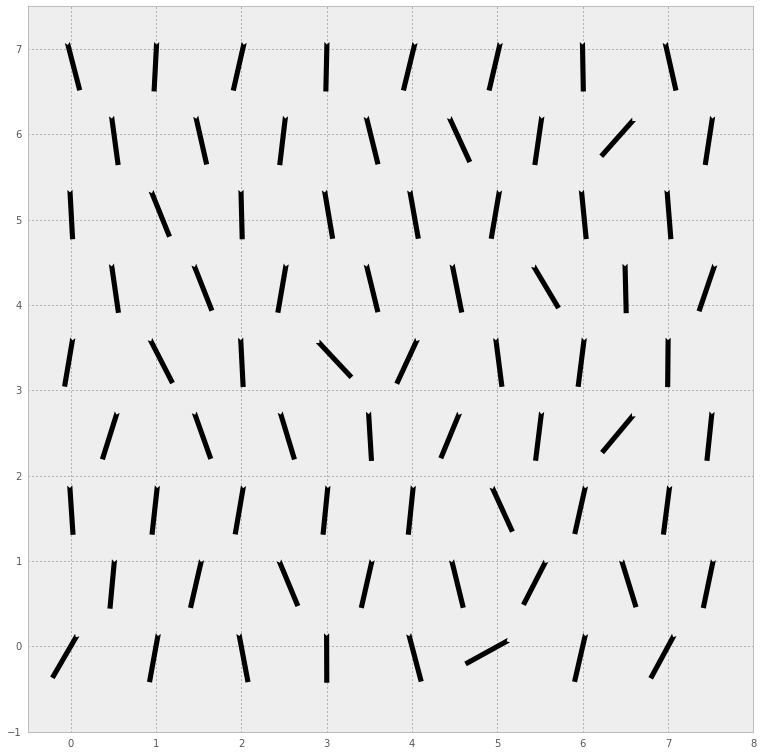

In [8]:
lames[2, :] = np.pi/2 + .1*np.pi*np.random.randn(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 10, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

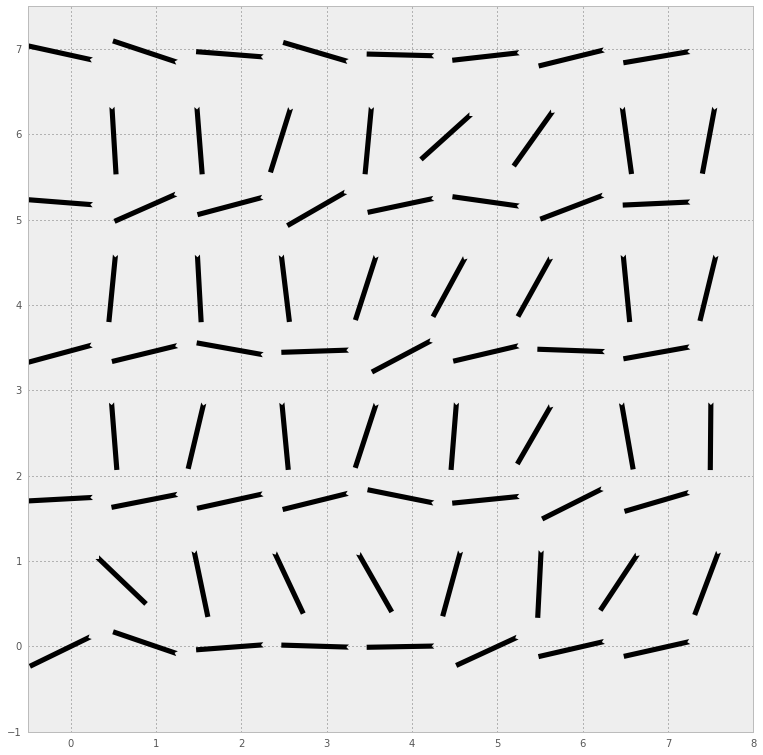

In [9]:
lames[2, :] = np.pi/2*np.mod(np.floor(np.arange(N_lame)/N_lame_X), 2) + .1*np.pi*np.random.randn(N_lame)
fig = plt.figure(figsize=(fig_width, fig_width))
ax = fig.add_subplot(111)
ax.quiver(lames[0, :], lames[1,:], np.cos(lames[2, :]), np.sin(lames[2,:]), pivot='middle', scale = 8, headwidth=0)
_ = plt.axis([-.5, 8, -1., 7.5])

## Synthèse : crétion d'un classe

In [10]:
#%run /tmp/EdgeGrid.py
from elasticite import EdgeGrid      
e = EdgeGrid(N_lame = 72, grid_type = 'hex', verb=False, structure=False)

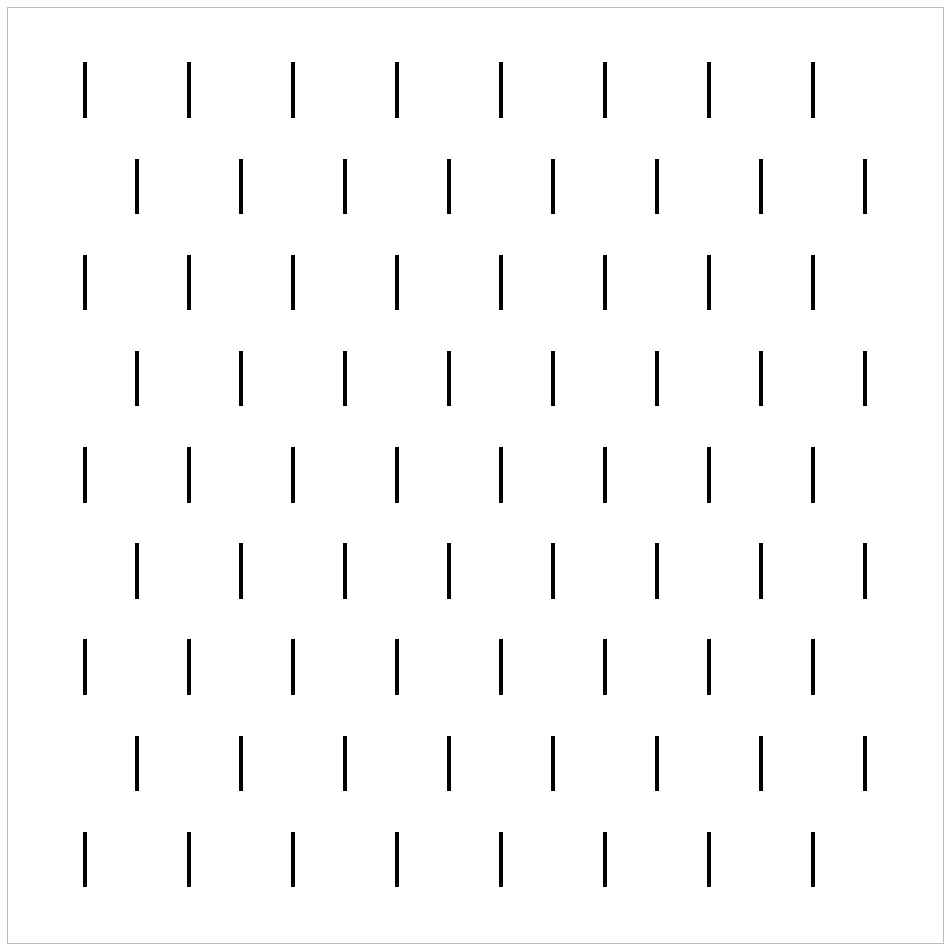

In [11]:
e.lames[2, :] = np.pi/2 
_ = e.show_edges()

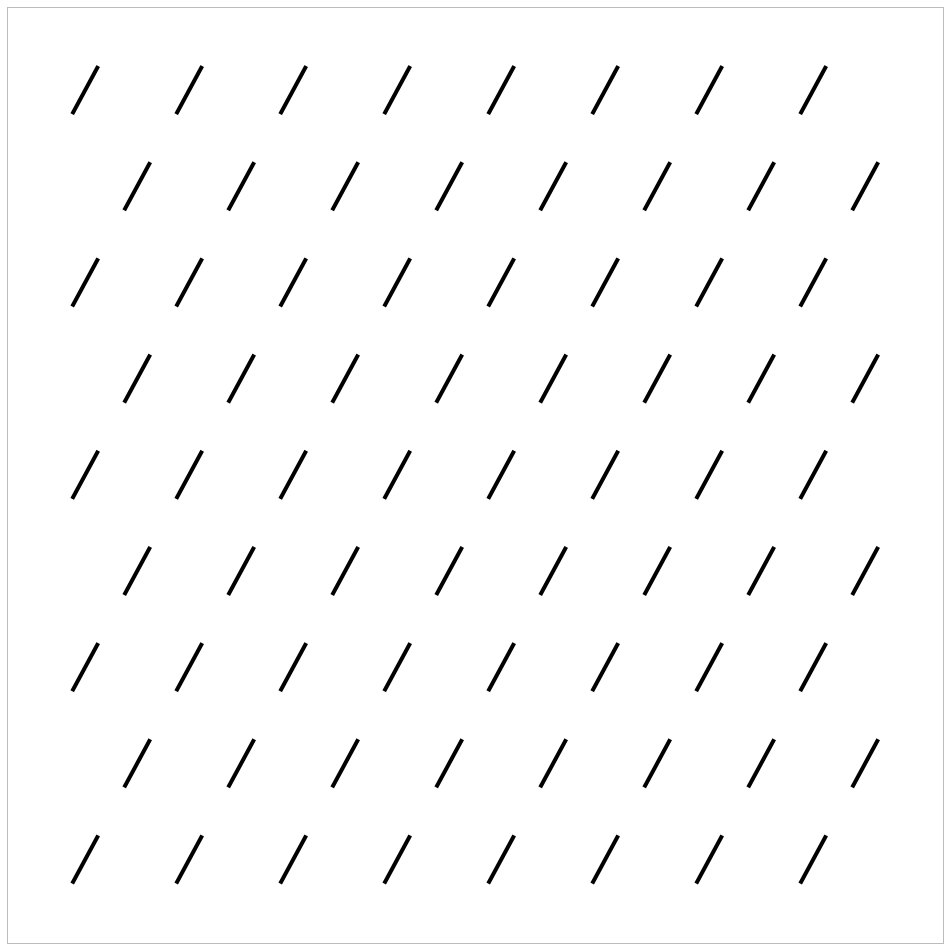

In [12]:
e.lames[2, :] = np.pi/3
_ = e.show_edges()

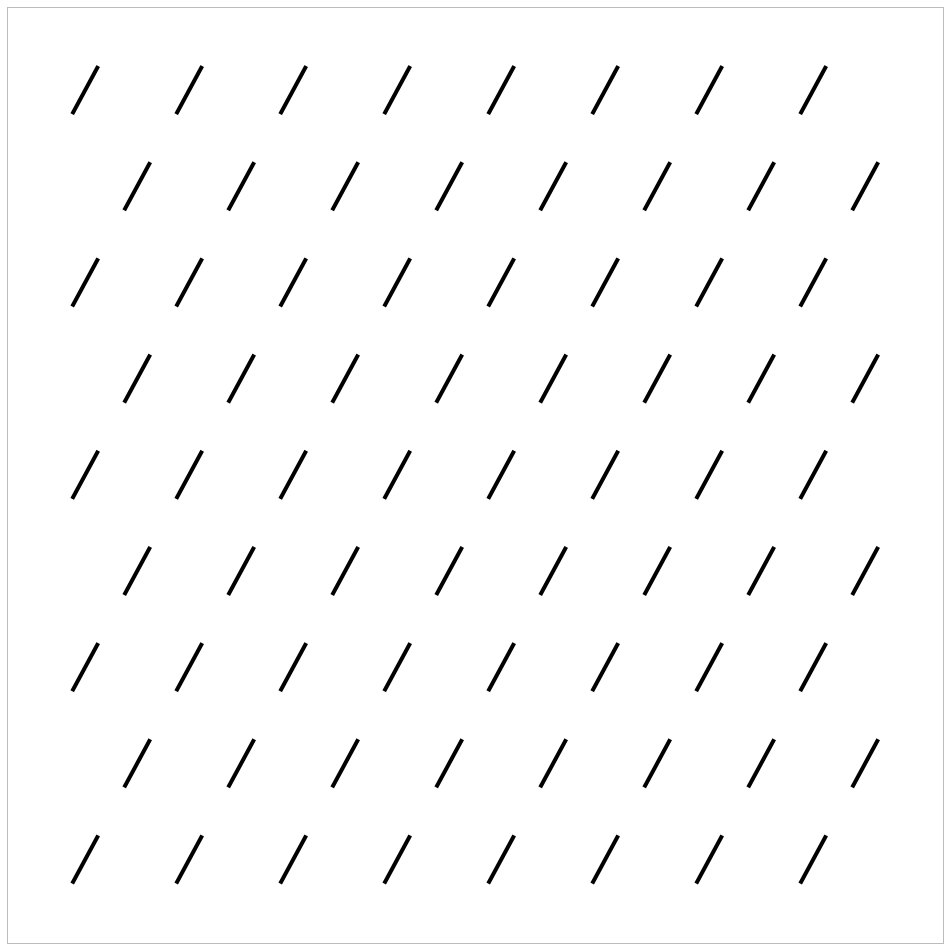

In [13]:
e.lames[2, :] = np.pi/3 
_ = e.show_edges()

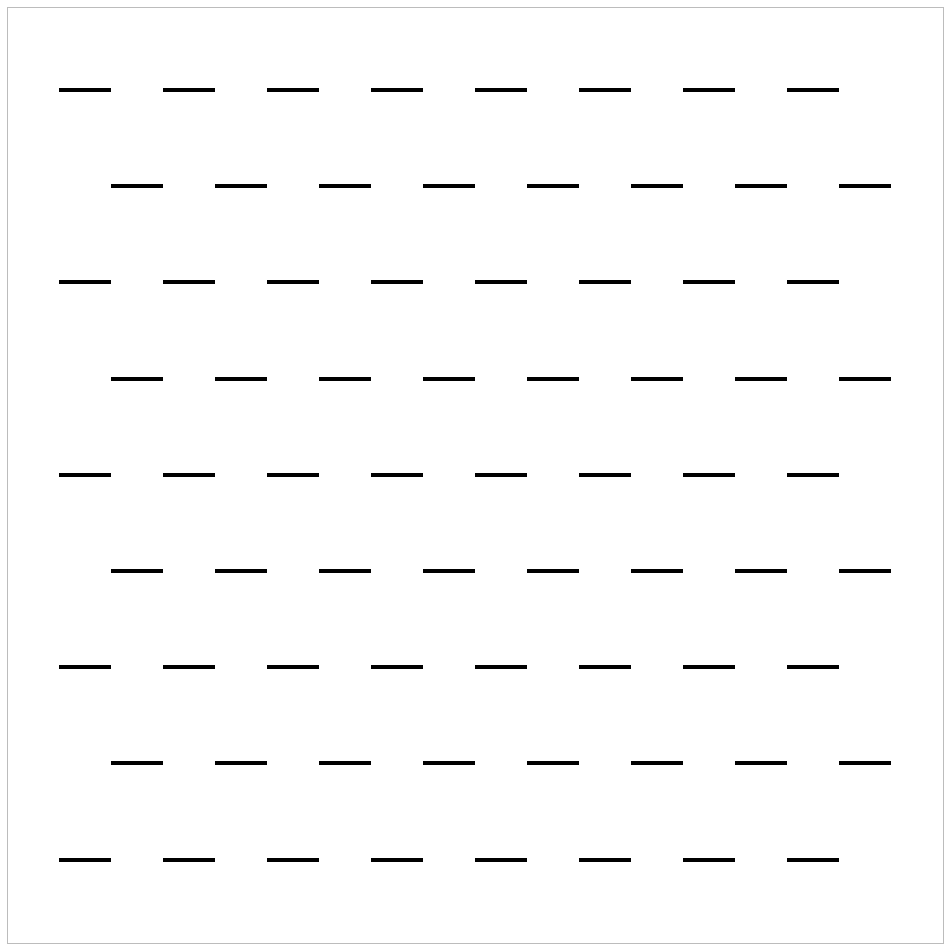

In [14]:
e.lames[2, :] = 0. 
_ = e.show_edges()

The coordinates coorrespond to:
- the first column (X axis) correspond to horizontal
- the second column (Y axis) to vertical
Coordinates are between zero (left or bottom) to one (right or top)

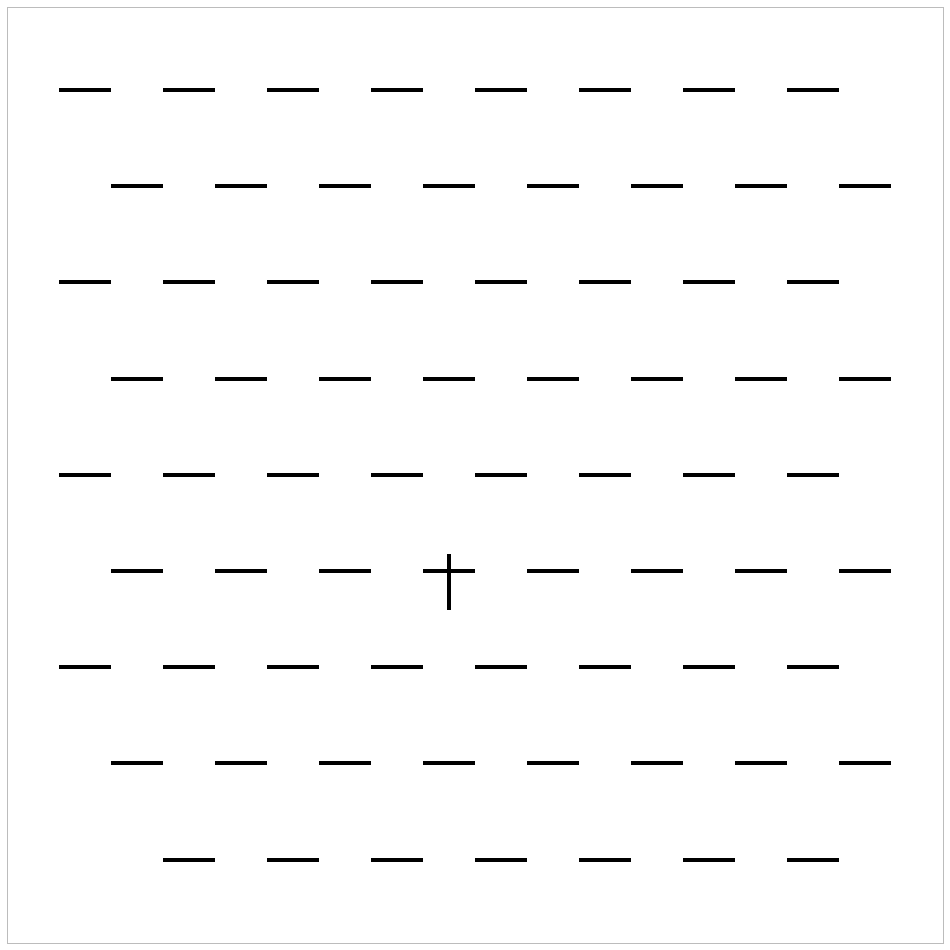

In [15]:
import numpy as np
e.lames[0, 0] = -0.0
e.lames[1, 0] = 0.0
e.lames[2, 0] = np.pi/2 
_ = e.show_edges()

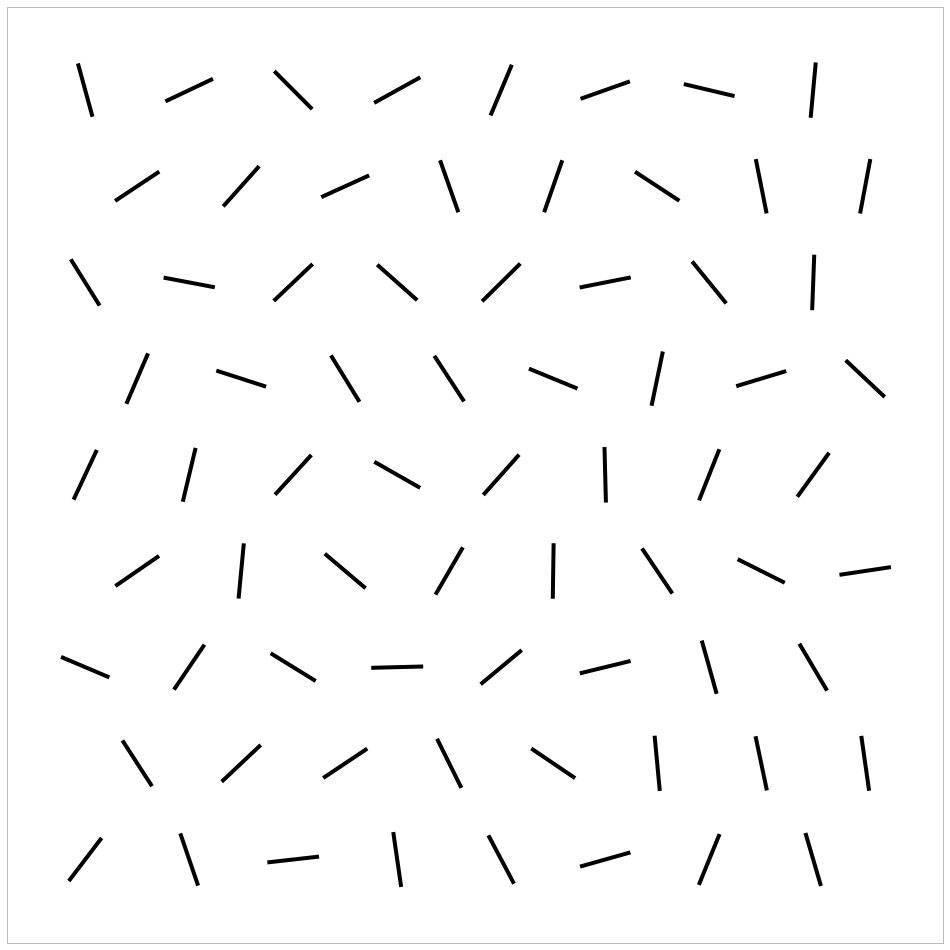

In [16]:
e = EdgeGrid(N_lame = 72, grid_type = 'hex', verb=False, structure=False)
e.lames[2, :] = np.pi*np.random.rand(e.N_lame)
_ = e.show_edges()

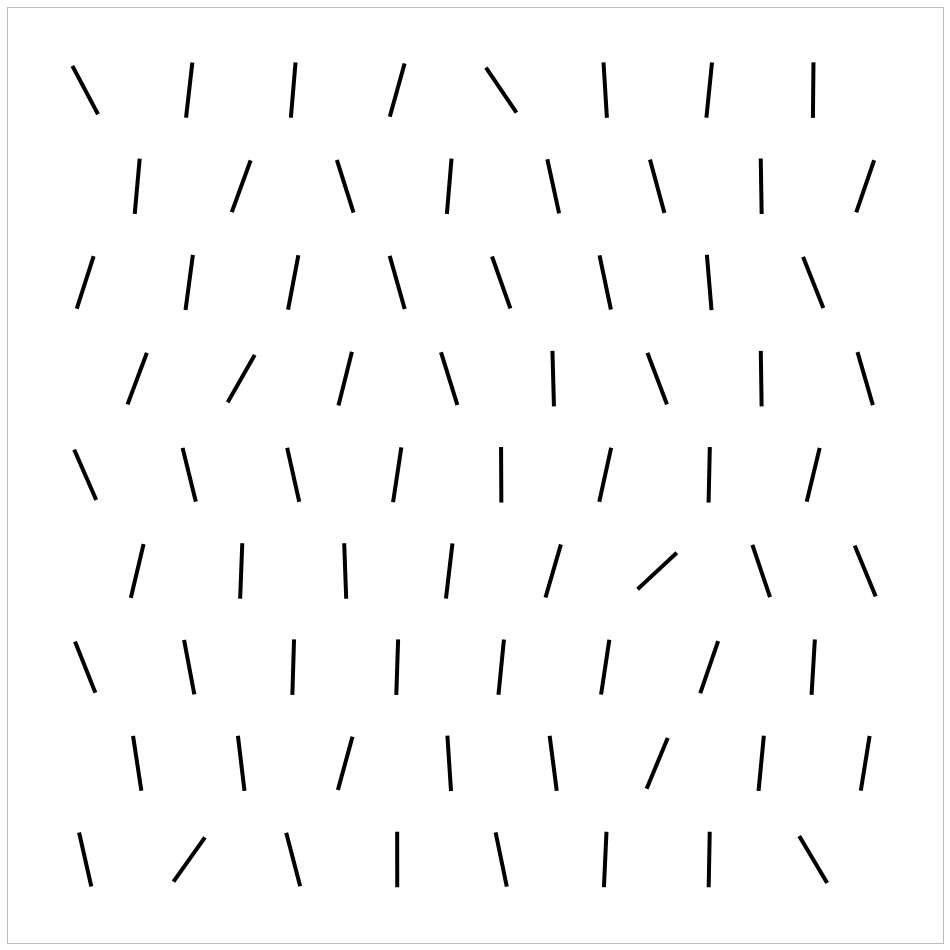

In [17]:
e.lames[2, :] = np.pi/2 + .1*np.pi*np.random.randn(e.N_lame)
_ = e.show_edges()